#Proyecto 
## Predicción de la calidad del agua
Los datos utilizados en el presente proyecto fueron obtenidos de https://www.kaggle.com/adityakadiwal/water-potability



![texto alternativo](https://www.elagoradiario.com/wp-content/uploads/2021/01/agua.jpg)

**Descripción de los datos**
* ph: Ph del agua
* Hardness: Capacidad del agua para precipitar jabón en mg/L
* Solids: Total de sólidos disueltos en ppm
* Chloramines: Cantidad de cloraminas en ppm
* Sulfate: Cantidad de sulfatos disueltos en mg/L
* Conductivity: Conductividad eléctrica del agua en μS/cm
* Organic_carbon: Cantidad de carbono orgáncio en ppm
* Trihalomethanes: Cantidad de trihalometanos en μg/L
* Turbidity:  Medida de la propiedad de emisión de luz del agua en NTU (Unidades nefelométricas de turbidez)
* Potability: Indica si el agua es segura para el consumo humano

ppm : Partes por millón







#1. Análisis Exploratorio y Preprocesamiento de datos

**Análisis inicial**

In [ ]:
#Importamos las librerías a utilizar
import pandas as pd
import numpy as np
import missingno as ms
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importamos el dataset 
data = pd.read_csv("https://raw.githubusercontent.com/SergioGerman412/Grupo-de-Estudio/main/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Encontrando las dimensiones del dataset

In [ ]:
print("El tamaño del dataset es",data.shape[0],"filas y ",data.shape[1],"columnas")

El tamaño del dataset es 3276 filas y  10 columnas


In [ ]:
#Mostramos datos estadísticos del dataset
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Hallamos la cantidad de valores en el target **Potability**

In [ ]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Analizando la correlación de las variables

Text(0.5, 1.0, 'Correlación de las variables')

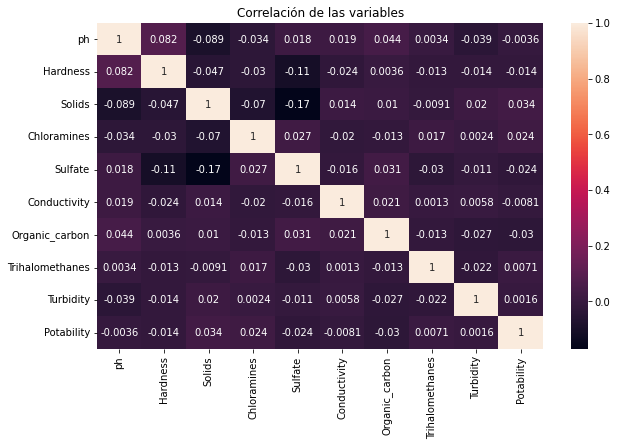

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr,
            xticklabels = True,
            yticklabels = True,
            annot = True,
            ax=ax
)
plt.title('Correlación de las variables')

Se observa que los valores de las correlaciones son cercanos a 0, por lo que todas las variables aportan información y no pueden ser eliminadas.

**Detectando valores duplicados**

In [ ]:
data.duplicated().sum()

0

Se observa que no existen valores duplicados en el dataset

**Detectando valores nulos**

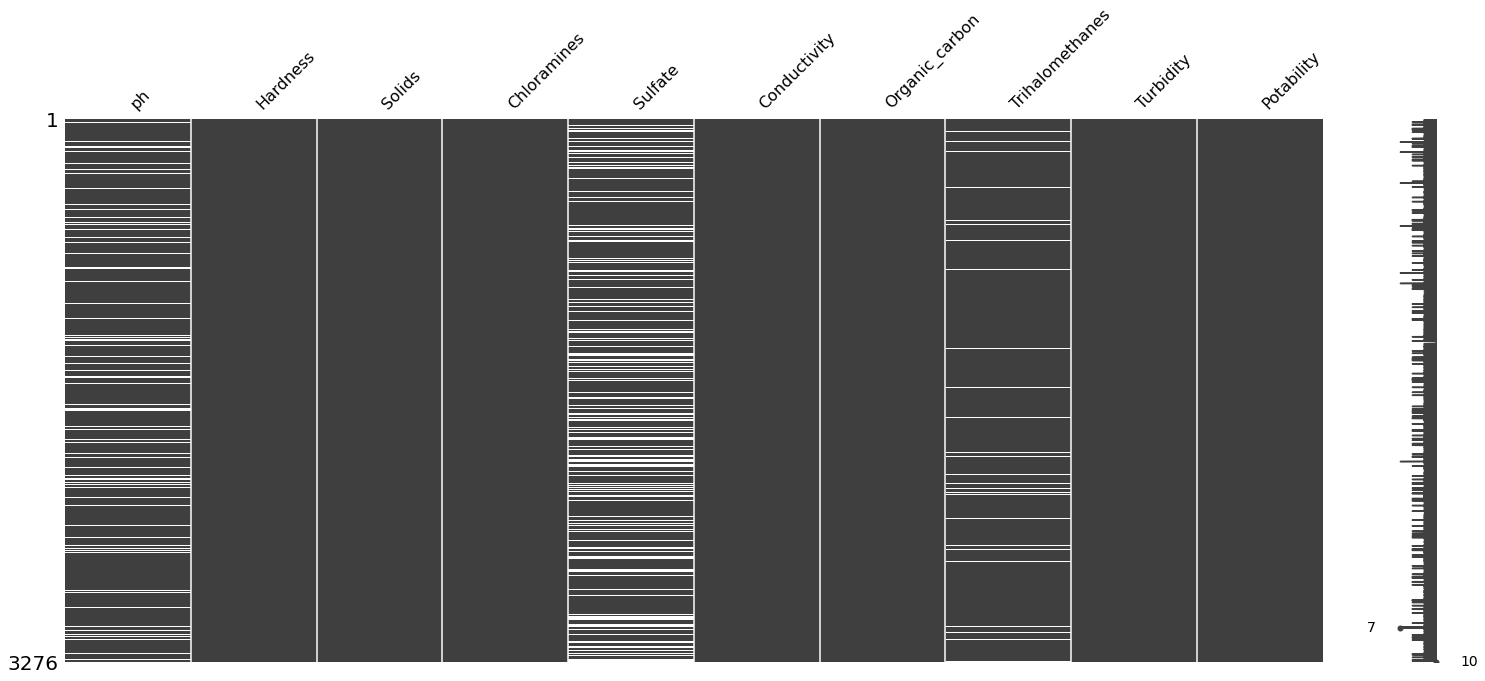

In [ ]:
ms.matrix(data)

Se observa la existencia de valores nulos en las columnas "pH", "sulfate" y "trihalomethanes". Hallando la cantidad de ellos:

In [ ]:
print("Cantidad de valores nulos por columna\n")
data.isna().sum()

Cantidad de valores nulos por columna



ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Reemplazando los valores nulos**

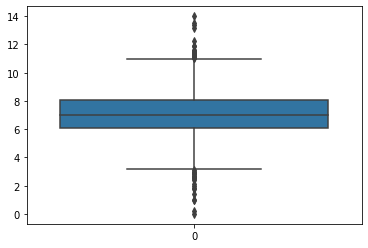

In [ ]:
sns.boxplot(data=data[data.columns[0]])

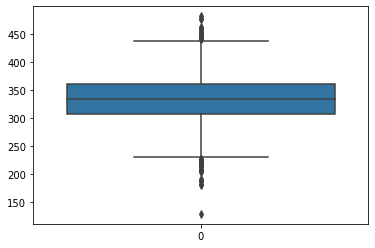

In [ ]:
sns.boxplot(data=data[data.columns[4]])

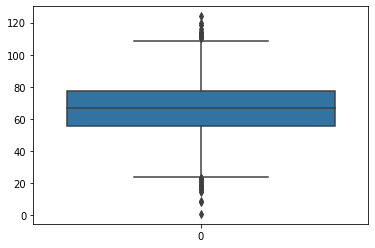

In [ ]:
sns.boxplot(data=data[data.columns[7]])

Se observa que existen outliers por lo que es conveniente reemplazar los valores vacíos por la mediana correspondiente a los datos de las columnas


In [ ]:
list_medianas = data.median()

In [ ]:
data.fillna(list_medianas, inplace = True)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
print("Cantidad de valores nulos por columna\n")
data.isna().sum()

Cantidad de valores nulos por columna



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Notamos que ya no hay valores nulos en el dataset

**Normalizamos los datos del dataset**

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
data_to_norm = [data['ph'],data['Hardness'], data['Solids'], data['Chloramines'], data['Sulfate'], data['Conductivity'], data['Organic_carbon'], data['Trihalomethanes'], data['Turbidity']]

In [ ]:
data_normalizada  = normalize(data_to_norm)

In [ ]:
data = data.assign(ph = data_normalizada[0]) 
data = data.assign(Hardness = data_normalizada[1]) 
data = data.assign(Solids = data_normalizada[2]) 
data = data.assign(Chloramines = data_normalizada[3]) 
data = data.assign(Sulfate = data_normalizada[4]) 
data = data.assign(Conductivity = data_normalizada[5]) 
data = data.assign(Organic_carbon = data_normalizada[6]) 
data = data.assign(Trihalomethanes = data_normalizada[7]) 
data = data.assign(Turbidity = data_normalizada[8]) 
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.017016,0.017979,0.015330,0.017481,0.019187,0.022728,0.012368,0.022268,0.012806,0
1,0.008986,0.011357,0.013736,0.015889,0.017342,0.023879,0.018088,0.014419,0.019450,0
2,0.019584,0.019677,0.014680,0.022212,0.017342,0.016860,0.020100,0.017002,0.013207,0
3,0.020111,0.018811,0.016235,0.019299,0.018582,0.014631,0.021968,0.025685,0.020004,0
4,0.021986,0.015892,0.013256,0.015677,0.016148,0.016046,0.013772,0.008191,0.017611,0


**Detectando outliers**

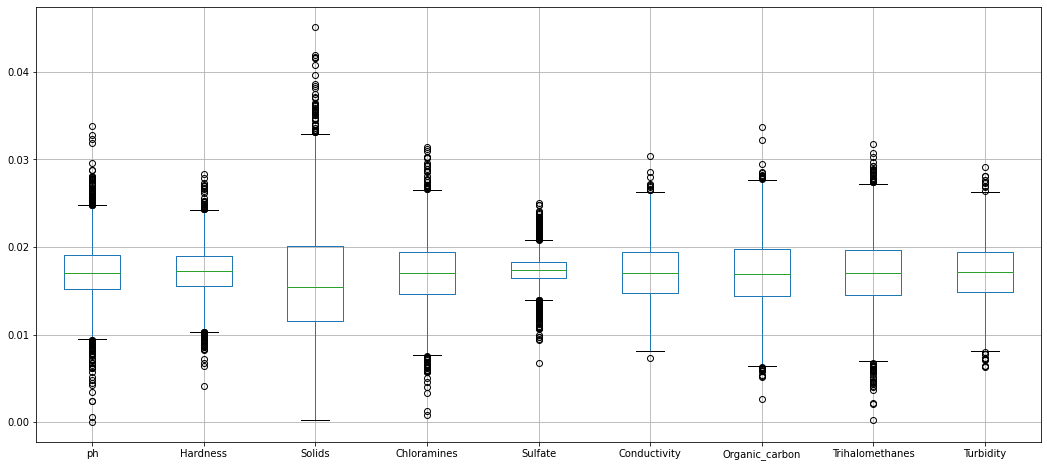

In [ ]:
data.drop(['Potability'],axis=1).plot(kind = 'box',
              figsize = (18,8)
)
plt.grid()

In [ ]:
for col in data.columns[0:9]:
  std = 2*data[col].std() + data[col].mean()
  std2 = 2*data[col].std() - data[col].mean()
  print('Valores atípicos identificados en',col,":", len([x for x in data[col] if x < std2 or x > std]))


Valores atípicos identificados en ph : 103
Valores atípicos identificados en Hardness : 90
Valores atípicos identificados en Solids : 127
Valores atípicos identificados en Chloramines : 72
Valores atípicos identificados en Sulfate : 112
Valores atípicos identificados en Conductivity : 96
Valores atípicos identificados en Organic_carbon : 74
Valores atípicos identificados en Trihalomethanes : 78
Valores atípicos identificados en Turbidity : 67


**Eliminando los outliers**

Observamos que en la variable ph hay una mayor cantidad de outliers que se hayan muy alejados de la media. 

Para ello tomamos como criterio que se alejen 2 desviaciones estándar de la media

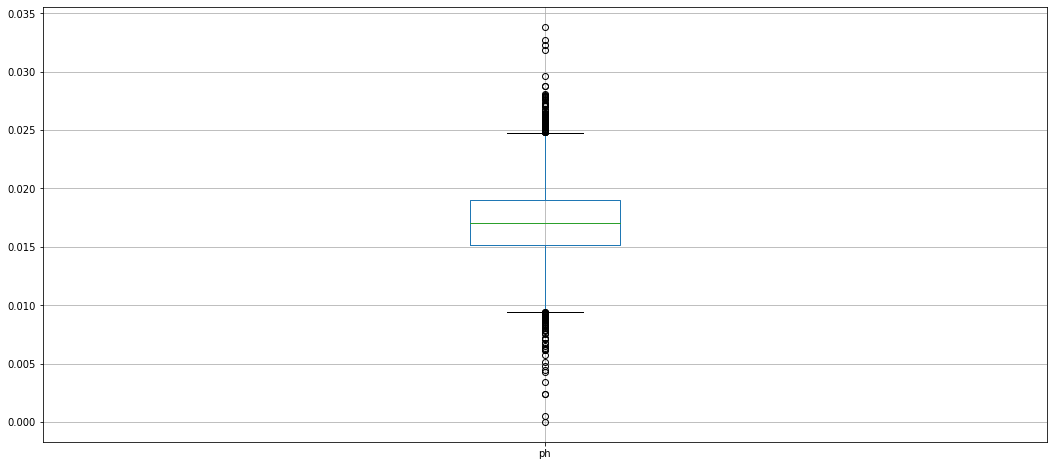

In [ ]:
data['ph'].plot(kind = 'box',
              figsize = (18,8)
)
plt.grid()

In [ ]:
std =  data['ph'].mean() + 2*data['ph'].std() 
std2 = data['ph'].mean() - 2*data['ph'].std()

In [ ]:
es_outlier = (data.ph > std2) & (data.ph < std)
data = data[es_outlier]

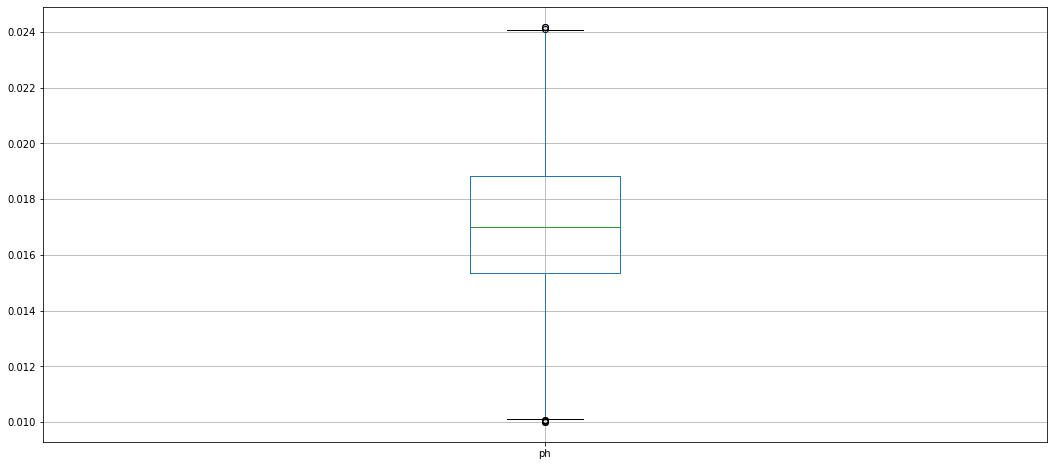

In [ ]:
data['ph'].plot(kind = 'box',
              figsize = (18,8)
)
plt.grid()

Particionamiento del dataset

In [ ]:
X = data.drop('Potability',axis=1)
y = data['Potability']

In [ ]:
#Realizamos la división de ambas variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separa el 15% de la data para generar las predicciones

In [ ]:
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (2618, 9) y para el y_train (2618,)
Para el X_test: (462, 9) y para el y_test (462,)


#2. Modelo Random Forest

Con particionamiento simple (empleando X_train, X_test, y_train e y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(criterion='gini',n_jobs = -1,max_depth=3,random_state=1) 
rf.fit(X_train,y_train) 
rf_pred = rf.predict(X_test) 
rf_pred 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Obtenemos cual es la variable más importante

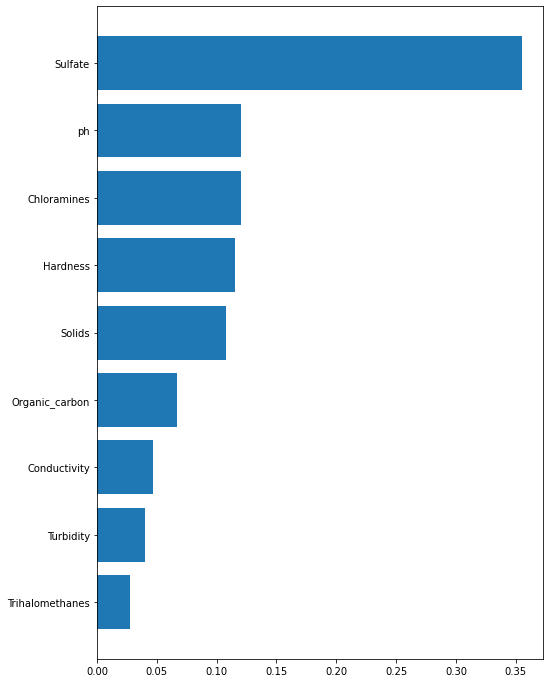

In [ ]:
pesos = rf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(pesos)
plt.barh(range(len(indices)), pesos[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.show()

In [ ]:
rf_prob = rf.predict_proba(X_test)[:,1]
rf_prob

array([0.4083165 , 0.53225847, 0.37846495, 0.37483046, 0.37067718,
       0.37747671, 0.49291712, 0.34841131, 0.41020927, 0.430588  ,
       0.38724736, 0.36839688, 0.48236056, 0.39136765, 0.431198  ,
       0.36799951, 0.37714051, 0.36568325, 0.40600838, 0.39274029,
       0.37070496, 0.49746825, 0.38390934, 0.36294568, 0.40951054,
       0.38597482, 0.46822109, 0.41709446, 0.39866373, 0.51698402,
       0.44820118, 0.37537119, 0.38291968, 0.38029152, 0.42359939,
       0.38897962, 0.38765629, 0.36667178, 0.43687215, 0.38045521,
       0.39380703, 0.37927302, 0.52782455, 0.39763984, 0.4755186 ,
       0.3557056 , 0.40491907, 0.38723452, 0.47778583, 0.41731719,
       0.37728791, 0.40959428, 0.37785159, 0.36929796, 0.40839888,
       0.37558475, 0.3764315 , 0.39093935, 0.41526048, 0.39737566,
       0.42042494, 0.39263788, 0.36591617, 0.38367168, 0.35724576,
       0.40965166, 0.38638759, 0.38923806, 0.38970111, 0.38028693,
       0.44947858, 0.35060193, 0.37439389, 0.3847635 , 0.41018

In [ ]:
from sklearn.metrics import accuracy_score
print('El accuracy para mi tercer modelo es :{0:.2f}'.format(accuracy_score(y_test,rf_pred)))

El accuracy para mi tercer modelo es :0.66


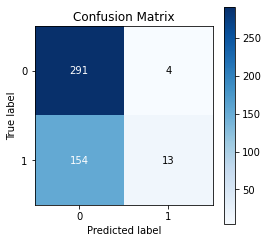

In [ ]:
!pip install -q scikit-plot 
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,rf_pred, figsize=(4,4))

In [ ]:
from sklearn.metrics import classification_report 
rf_report = classification_report(y_test, rf_pred, target_names=['0' , '1']) 
print(rf_report)

              precision    recall  f1-score   support

           0       0.65      0.99      0.79       295
           1       0.76      0.08      0.14       167

    accuracy                           0.66       462
   macro avg       0.71      0.53      0.46       462
weighted avg       0.69      0.66      0.55       462



Utilizando K-Fold Cross Validation y SMOTE (data desbalanceada)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(X, y)

In [ ]:
x_res.shape,y_res.shape

((3706, 9), (3706,))

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf, x_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.2f (%.2f)' % (mean(scores), std(scores)))

Accuracy: 0.73 (0.02)


#3. Modelo Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression 
rl = LogisticRegression(random_state=1) 
rl.fit(X_train, y_train) 
rl_pred = rl.predict(X_test)
rl_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
rl_prob = rl.predict_proba(X_test)[:, 1]
rl_prob

array([0.40481067, 0.40527201, 0.40548882, 0.40518753, 0.40498648,
       0.40489151, 0.40479857, 0.40415248, 0.40480592, 0.40497084,
       0.40479277, 0.40463513, 0.40488167, 0.40424899, 0.40466305,
       0.40429235, 0.40488378, 0.40478359, 0.40486635, 0.40460814,
       0.40516802, 0.40503366, 0.40476038, 0.40403844, 0.40505204,
       0.40458296, 0.40518471, 0.40448272, 0.40518664, 0.40548432,
       0.405755  , 0.40493033, 0.40514235, 0.40488088, 0.40547265,
       0.40443519, 0.404958  , 0.40467536, 0.40537179, 0.40437855,
       0.40548569, 0.40518302, 0.40583229, 0.405283  , 0.40535602,
       0.40486765, 0.40534744, 0.4046857 , 0.40473163, 0.40454711,
       0.40466546, 0.40523299, 0.40457062, 0.40454971, 0.40501598,
       0.40476636, 0.40499238, 0.40470883, 0.40506539, 0.40490254,
       0.40564492, 0.40544005, 0.40444391, 0.40544041, 0.4045338 ,
       0.40458066, 0.40476965, 0.40492926, 0.40489721, 0.4049896 ,
       0.40595814, 0.40483877, 0.4043267 , 0.40589589, 0.40454

In [ ]:
coeficientes = pd.DataFrame({'variables':X_train.columns.values, 'betas': np.round(rl.coef_[0],4) })
coeficientes

,variables,betas
0,ph,-0.0335
1,Hardness,-0.0466
2,Solids,0.2288
3,Chloramines,0.1243
4,Sulfate,-0.0618
5,Conductivity,-0.0856
6,Organic_carbon,-0.1367
7,Trihalomethanes,0.0200
8,Turbidity,0.0962


In [ ]:
from sklearn.metrics import accuracy_score
print('El accuracy para mi primero modelo es :{0:.2f}'.format(accuracy_score(y_test,rl_pred)))

El accuracy para mi primero modelo es :0.64


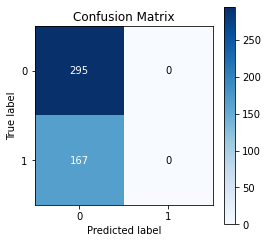

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,rl_pred, figsize=(4,4))

In [ ]:
rl_report = classification_report(y_test, rl_pred, target_names=['0' , '1']) 
print(rl_report)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       295
           1       0.00      0.00      0.00       167

    accuracy                           0.64       462
   macro avg       0.32      0.50      0.39       462
weighted avg       0.41      0.64      0.50       462



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Utilizando K-Fold Cross Validation

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
rl = LogisticRegression(random_state=1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rl, x_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.2f (%.2f)' % (mean(scores), std(scores)))

Accuracy: 0.47 (0.01)


#4. Resultados Obtenidos

Después de haber utilizado los modelos Random Forest y de Regresión Logística, se concluye que el más apropiado es el primero pues con este, se obtiene un mayor accuracy 0.66, mientras que en el otro, 0.64. Adicionalmente, al aplicar **K-Fold Cross Validation** para el entrenamiento y validación de datos, se obtuvo un aumento en el **accuracy** para el modelo **Random Forest (0.74)**, mientras que para el modelo de Regresión Logística un descenso (0.47). 
 
El modelo de Regresión Logística resulto ser deficiente pues no predecía valores '1' en el target predecido.

Además de ello, cabe mencionar que se realizó una limpieza de outliers únicamente en la variable ph, ya que al realizar el mismo procedimiento en las demás variables, el modelo era afectado, no se obtenía valores '1' en el target predecido, solo '0'. Por ello, se optó por eliminar los outliers en la variable que presenta la mayor cantidad y que se hallen más alejados de la media.
